<a href="https://colab.research.google.com/github/Alexander-Renteria-DevMl/Alexander-Renteria-DevMl/blob/main/Fundamentos_para_AI_Y_Machine_Learning_Precios_de_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Precios de Casas con datos Ejercicio practico para la clase


**Regresion lineal para prediccionde precios de casas**
En este ejecicio aprendi a usar la regresion lineal para predecir el precio de una casa a partir de variables como : Tamaño , Numero de habitaciones , Antigedad y Ubicacion .
Utilizo datos datos sinteticos (Simulados) pero realistas para entrenar un modelo y evaluarlo paso a paso


# Libreria Utilizadas:
* numpy: operaciones matematicas y generacion de datos aleatorios
* pandas: manejo y exploracionn de datos en tablas
* matplotlib y searbon: visualizadon de datos
* sklearn: herramientas para machine learning , incluye regresion lineal y metricas de evaluacion







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generacion de datos sinteticos

In [ ]:
# Fijamos la semilla para reproduccion de datos
np.random.seed(99)
n_casas=1000 # Cuantas observaciones vamos a tener , 1000 valores de casas

tamaño= np.random.normal(150,50,n_casas)
habitaciones = np.random.randint(1,6,n_casas)
edad=np.random.randint(0,50,n_casas)
ubicacion_score=np.random.uniform(2,7,n_casas)

tamaño=np.clip(tamaño,50,300) # la funcion clic , pone limites a los valores
ubicacion_score=np.clip(ubicacion_score,1,10)

# Funcion precio
precio=(
    tamaño*2000 +
    habitaciones * 15000 +
    -edad*800 + ubicacion_score*10000+
    np.random.normal(0,25000,n_casas)
)
precio=np.clip(precio, 50000, None) # Recorta los limites para nuestra variable obejtivo

#En el código, el término +-edad se refiere a cómo se incorpora la variable de edad en el modelo de regresión lineal.
#Esto indica que se está considerando tanto el impacto positivo como negativo de la edad en el precio de las casas.
#Al incluir esta variable, el modelo busca entender cómo la antigüedad de la propiedad puede afectar su valor,
#permitiendo que la regresión ajuste la relación entre edad y precio, ya sea aumentando o disminuyendo el precio según la edad de la propiedad.

#A continuacion Vamos a mostrar la informacion en datos tabulares utilizando "DataFrame"
datos_casas=pd.DataFrame(
    {
        'tamaño_m2':tamaño,
        'habitaciones':habitaciones,
        'edad_años':edad,
        'ubicacion_score':ubicacion_score,
        'precio':precio
    }
)
datos_casas.head()

,tamaño_m2,habitaciones,edad_años,ubicacion_score,precio
0,142.882058,5,13,4.956784,391160.589703
1,252.861087,2,47,6.402198,583168.814886
2,164.163097,5,31,2.794381,431467.763628
3,216.490599,3,49,4.276270,495698.551255
4,142.268907,3,45,2.058016,319780.004768


# Paso 2 : Analisis exploratorio


In [ ]:
print(datos_casas.describe())


         tamaño_m2  habitaciones    edad_años  ubicacion_score         precio
count  1000.000000   1000.000000  1000.000000      1000.000000    1000.000000
mean    153.310102      3.029000    23.931000         4.500438  378386.604583
std      48.669957      1.387113    14.389068         1.426748  105459.041083
min      50.000000      1.000000     0.000000         2.000414   86444.555588
25%     119.583429      2.000000    12.000000         3.251315  305152.766658
50%     152.335216      3.000000    23.500000         4.489721  378382.895793
75%     187.759559      4.000000    36.000000         5.711297  455244.749812
max     300.000000      5.000000    49.000000         6.999123  739350.147572


/tmp/ipython-input-410504494.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,2].boxplot([datos_casas[datos_casas['habitaciones']==i]['precio'] for i in range(1,6)],labels=range(1,6))


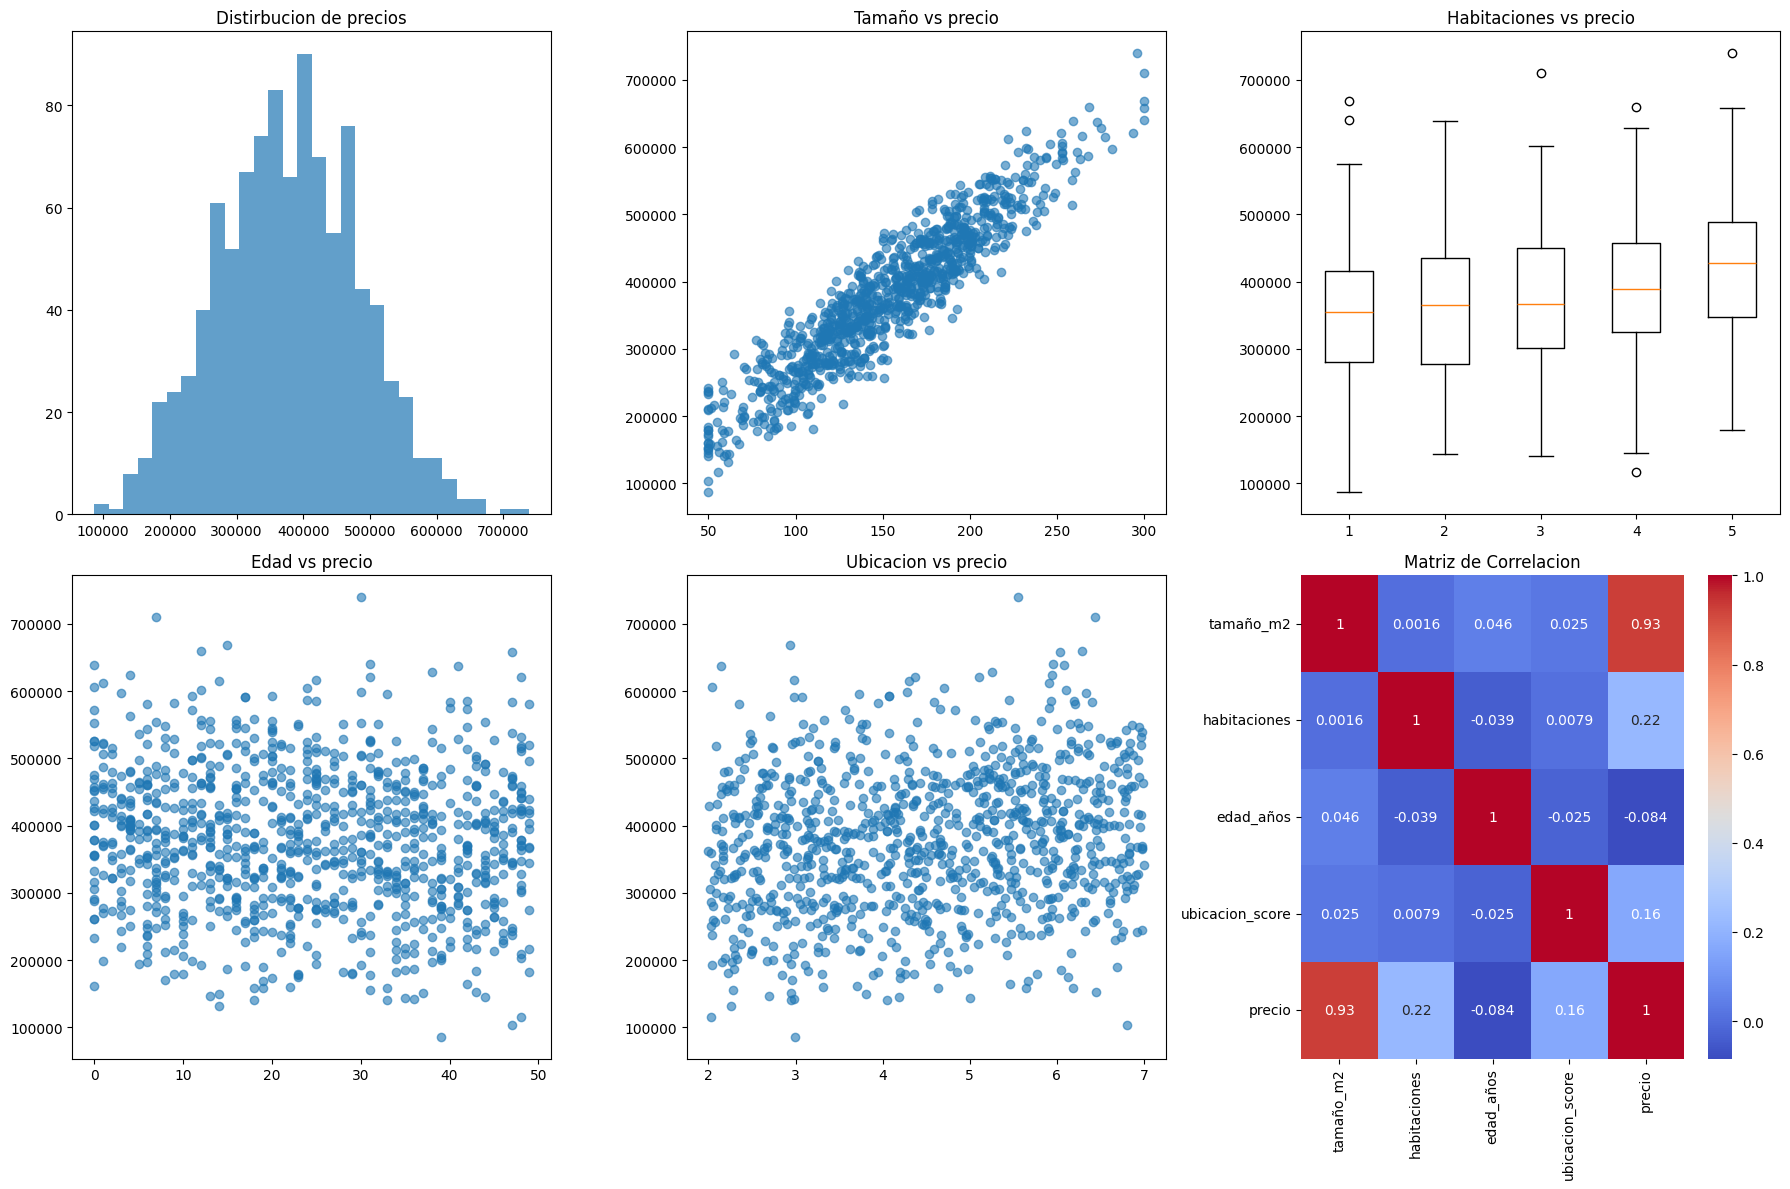

In [ ]:
# Visaulizacion de graficas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Grafica de Histograma
axes[0,0].hist(datos_casas['precio'],bins=30,alpha=0.7)
axes[0,0].set_title('Distirbucion de precios')
# Grafica dispersion
axes[0,1].scatter(datos_casas['tamaño_m2'],datos_casas['precio'],alpha=0.6)
axes[0,1].set_title("Tamaño vs precio")
# Grafica de cajas
axes[0,2].boxplot([datos_casas[datos_casas['habitaciones']==i]['precio'] for i in range(1,6)],labels=range(1,6))
axes[0,2].set_title("Habitaciones vs precio")
# Grafica de dispersion
axes[1,0].scatter(datos_casas['edad_años'],datos_casas['precio'],alpha=0.6)
axes[1,0].set_title("Edad vs precio")
# Grafica de dispersion
axes[1,1].scatter(datos_casas['ubicacion_score'],datos_casas['precio'],alpha=0.6)
axes[1,1].set_title("Ubicacion vs precio")
# Grafica de Dispersion
sns.heatmap(datos_casas.corr(),annot=True,cmap='coolwarm',ax=axes[1,2])
axes[1,2].set_title("Matriz de Correlacion")

plt.tight_layout()
plt.show()

# Paso 3: Preparar los datos para regresion

In [ ]:
x= datos_casas[['tamaño_m2','habitaciones','edad_años','ubicacion_score']]
y= datos_casas['precio']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape,x_test.shape

((800, 4), (200, 4))

#Paso 4: Entrenar modelo de regresion lineal


In [ ]:
modelo=LinearRegression() # LLamamos al modelo
modelo.fit(x_train,y_train) # Entrenamos al modelo con las variables x_train / y_train

LinearRegression()

In [ ]:
# La siguiente funcion nos ayudara a saber cuanto sube el precio por caracteristica
for feature , coef in zip (x.columns,modelo.coef_):
  print(f"{feature}: ${coef:,.2f}")
print(f"Intercepto: ${modelo.intercept_:,.2f}")

tamaño_m2: $1,998.08
habitaciones: $16,367.63
edad_años: $-843.05
ubicacion_score: $9,950.52
Intercepto: $-2,673.43


# Paso 5 Evaluacion del modelo


In [ ]:
y_pred = modelo.predict(x_test) # usamos la funcion predict. dentro del modelo , el cua ya ahbiamos llamado y intentamos predecir segun el entrenamiento

# Impresion
print(f"R^2:{r2_score(y_test, y_pred):.3f}")
print(f"MSE:{mean_squared_error(y_test, y_pred):.0f}")



R^2:0.951
MSE:608382786


# Paso 6 : Visual de prediciones y residuos


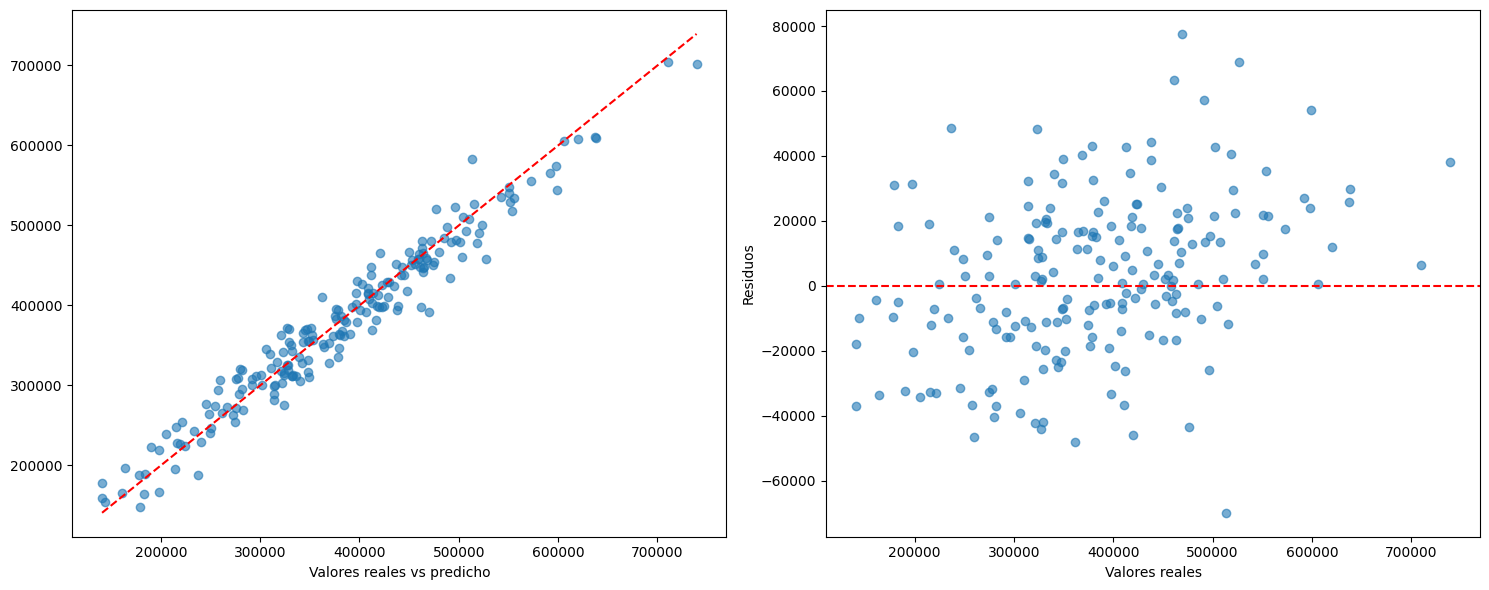

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Visualizacion
axes[0].scatter(y_test, y_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--')
axes[0].set_xlabel('Valores reales vs predicho')

residuos=y_test-y_pred
axes[1].scatter(y_test, residuos, alpha=0.6)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_xlabel('Valores reales')
axes[1].set_ylabel('Residuos')

plt.tight_layout()
plt.show()